Training complete.


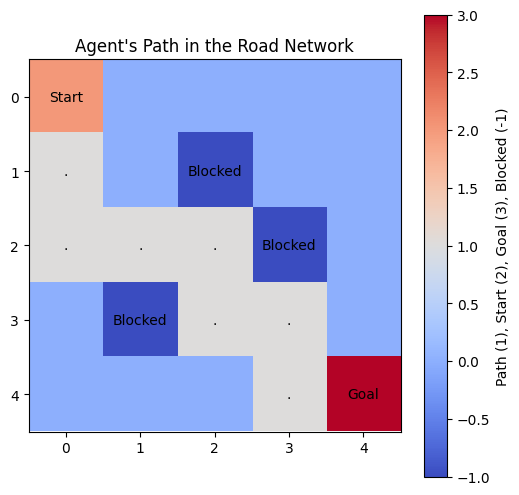

Path taken by the agent: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4)]
Agent successfully reached the goal intersection!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters for the road network
grid_size = 5
start = (0, 0)      # Starting intersection
goal = (4, 4)       # Goal intersection
blocked_roads = [(1, 2), (2, 3), (3, 1)]  # Intersections to avoid

# Rewards
goal_reward = 100        # Large reward for reaching the goal
blocked_road_penalty = -100  # Penalty for hitting a blocked road
move_penalty = -1        # Small penalty for each move

# Initialize Q-table with zeros
actions = ["up", "down", "left", "right"]
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Get the next intersection based on the action taken
def get_next_intersection(intersection, action):
    row, col = intersection
    if action == "up" and row > 0:
        row -= 1
    elif action == "down" and row < grid_size - 1:
        row += 1
    elif action == "left" and col > 0:
        col -= 1
    elif action == "right" and col < grid_size - 1:
        col += 1
    return (row, col)

# Get the reward for reaching a new intersection
def get_reward(intersection):
    if intersection == goal:
        return goal_reward
    elif intersection in blocked_roads:
        return blocked_road_penalty
    else:
        return move_penalty

# Choose an action using epsilon-greedy policy
def choose_action(intersection, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        row, col = intersection
        return actions[np.argmax(q_table[row, col])]  # Exploit

# Update the Q-value for a given intersection-action pair
def update_q_table(intersection, action, reward, next_intersection, alpha, gamma):
    row, col = intersection
    action_index = actions.index(action)
    next_row, next_col = next_intersection
    # Q-learning formula
    best_future_q = np.max(q_table[next_row, next_col])
    q_table[row, col, action_index] += alpha * (reward + gamma * best_future_q - q_table[row, col, action_index])

# Training parameters
alpha = 0.1     # learning rate
gamma = 0.9     # discount factor
epsilon = 0.3   # exploration rate
episodes = 1000

# Train the agent
for episode in range(episodes):
    intersection = start
    done = False

    while not done:
        # Choose action
        action = choose_action(intersection, epsilon)
        # Get next intersection and reward
        next_intersection = get_next_intersection(intersection, action)
        reward = get_reward(next_intersection)

        # Update Q-table
        update_q_table(intersection, action, reward, next_intersection, alpha, gamma)

        # Transition to the next intersection
        intersection = next_intersection

        # Check if episode has ended
        if intersection == goal or intersection in blocked_roads:
            done = True

    # Decay epsilon after each episode to reduce exploration over time
    epsilon = max(0.1, epsilon * 0.99)

print("Training complete.")

# Test the trained agent on the road route and record the path
intersection = start
path = [intersection]
while intersection != goal:
    action = choose_action(intersection, epsilon=0.0)  # Choose the best action (greedy)
    intersection = get_next_intersection(intersection, action)
    path.append(intersection)
    if intersection in blocked_roads:
        print("Agent encountered a blocked road!")
        break

# Matrix Visualization of the Grid
grid = np.zeros((grid_size, grid_size))

# Mark the path
for step in path:
    grid[step] = 1  # Mark path with 1

# Mark start, goal, and blocked roads
grid[start] = 2          # Start
grid[goal] = 3           # Goal
for road in blocked_roads:
    grid[road] = -1      # Blocked roads

# Plotting the grid
plt.figure(figsize=(6, 6))
plt.imshow(grid, cmap="coolwarm", origin="upper", interpolation="none")

# Add text annotations
for i in range(grid_size):
    for j in range(grid_size):
        if grid[i, j] == 2:
            plt.text(j, i, 'Start', ha='center', va='center', color='black')
        elif grid[i, j] == 3:
            plt.text(j, i, 'Goal', ha='center', va='center', color='black')
        elif grid[i, j] == -1:
            plt.text(j, i, 'Blocked', ha='center', va='center', color='black')
        elif (i, j) in path:
            plt.text(j, i, '.', ha='center', va='center', color='black')  # Path marker

plt.title("Agent's Path in the Road Network")
plt.colorbar(label="Path (1), Start (2), Goal (3), Blocked (-1)")
plt.show()

# Print the path taken by the agent
print("Path taken by the agent:", path)
if intersection == goal:
    print("Agent successfully reached the goal intersection!")
else:
    print("Agent did not reach the goal intersection.")


Enter the number of clusters (K): 2
Silhouette Score for k=2: 0.351


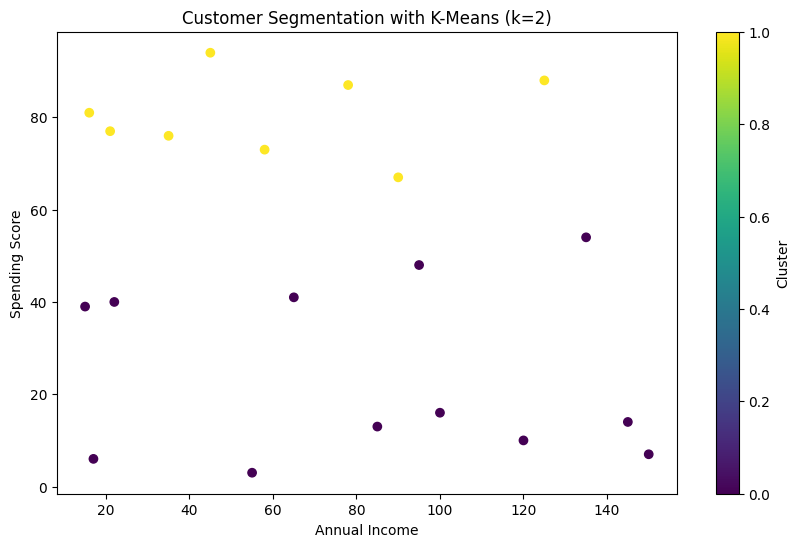

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Simulated data
data = {
    'Annual_Income': [15, 16, 17, 21, 22, 35, 45, 55, 58, 65, 78, 85, 90, 95, 100, 120, 125, 135, 145, 150],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 94, 3, 73, 41, 87, 13, 67, 48, 16, 10, 88, 54, 14, 7]
}
df = pd.DataFrame(data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Ask the user for the number of clusters
k = int(input("Enter the number of clusters (K): "))

# Apply K-Means with user-defined number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the Silhouette Score for the chosen K
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'Customer Segmentation with K-Means (k={k})')
plt.colorbar(label='Cluster')
plt.show()
